# Share the Insight

There are two main insights we want to communicate. 
- Bangalore is the largest market for Onion Arrivals. 
- Onion Price variation has increased in the recent years.

Let us explore how we can communicate these insight visually.

## Preprocessing to get the data

In [53]:
# Import the library we need, which is dplyr and ggplot2
library(dplyr)
library(ggplot2)

In [54]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df <- read.csv('MonthWiseMarketArrivals_Clean.csv')

In [55]:
str(df)

'data.frame':	10320 obs. of  10 variables:
 $ market  : Factor w/ 122 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ city    : Factor w/ 119 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state   : Factor w/ 22 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ date    : Factor w/ 243 levels "1996-01-01","1996-02-01",..: 109 121 169 181 193 205 217 229 110 122 ...


In [56]:
# Fix the date
df$date = as.Date(as.character(df$date), "%Y-%m-%d")

In [81]:
# Get the data for year 2015 and sort
df2015City <- df %>% 
          filter(year == 2015) %>%
          group_by(city) %>%
          summarize(quantity_year = sum(quantity)) %>%
          arrange(desc(quantity_year))

In [82]:
head(df2015City)

,city,quantity_year
1,BANGALORE,8267060
2,MAHUVA,5113510
3,SOLAPUR,4162041
4,PUNE,3591209
5,LASALGAON,3581359
6,PIMPALGAON,3455265


In [120]:
df2015City$city <- as.character(df2015City$city)
str(df2015City)

Classes 'tbl_df', 'tbl' and 'data.frame':	111 obs. of  2 variables:
 $ city         : chr  "BANGALORE" "MAHUVA" "SOLAPUR" "PUNE" ...
 $ quantity_year: int  8267060 5113510 4162041 3591209 3581359 3455265 3272139 2971205 2444020 1882161 ...


## Let us plot the Cities in a Geographic Map

Getting the geocode for each city, we will run it through the google maps API. We will use the `ggmap` library to do so.

For example searching for 'Bangalore', we can see the lat, lon as 12.9538477,77.3507442,10 in the url itself

https://www.google.co.in/maps/place/Bengaluru,+Karnataka+560001/@12.9538477,77.3507442,10z/data=!3m1!4b1!4m2!3m1!1s0x3bae1670c9b44e6d:0xf8dfc3e8517e4fe0

In [59]:
library(ggmap)

In [60]:
geocode('Bangalore')

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bangalore&sensor=false


,lon,lat
1,77.59456,12.9716


In [61]:
# Let us get the city, state name strings to run through this
dfGeo <- df %>%
         mutate(city_state = paste(city, state, sep=", ")) %>%
         select(city, state, city_state) %>%
         distinct(city_state)

In [62]:
str(dfGeo)

'data.frame':	119 obs. of  3 variables:
 $ city      : Factor w/ 119 levels "ABOHAR","AGRA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state     : Factor w/ 22 levels "AP","ASM","BHR",..: 17 21 5 15 18 21 18 17 21 12 ...
 $ city_state: chr  "ABOHAR, PB" "AGRA, UP" "AHMEDABAD, GUJ" "AHMEDNAGAR, MS" ...


In [63]:
dfGeo$city <- as.character(dfGeo$city)

In [64]:
dim(dfGeo)

[1] 119   3

In [65]:
dfGeo$city

[1] "ABOHAR"        "AGRA"          "AHMEDABAD"     "AHMEDNAGAR"   
  [5] "AJMER"         "ALIGARH"       "ALWAR"         "AMRITSAR"     
  [9] "BALLIA"        "BANGALORE"     "BAREILLY"      "BELGAUM"      
 [13] "BHATINDA"      "BHAVNAGAR"     "BHOPAL"        "BHUBNESWER"   
 [17] "BIHARSHARIF"   "BIJAPUR"       "BIKANER"       "BOMBORI"      
 [21] "BURDWAN"       "CHAKAN"        "CHALLAKERE"    "CHANDIGARH"   
 [25] "CHANDVAD"      "CHENNAI"       "CHICKBALLAPUR" "COIMBATORE"   
 [29] "DEESA"         "DEHRADOON"     "DELHI"         "DEORIA"       
 [33] "DEVALA"        "DEWAS"         "DHAVANGERE"    "DHULIA"       
 [37] "DINDIGUL"      "DINDORI"       "ETAWAH"        "FARUKHABAD"   
 [41] "GONDAL"        "GORAKHPUR"     "GUWAHATI"      "HALDWANI"     
 [45] "HASSAN"        "HOSHIARPUR"    "HUBLI"         "HYDERABAD"    
 [49] "INDORE"        "JAIPUR"        "JALANDHAR"     "JALGAON"      
 [53] "JAMMU"         "JAMNAGAR"      "JHANSI"        "JODHPUR"      
 [57] "JUNNAR"        "KALVAN"        "KANPUR"        "KARNAL"       
 [61] "KHANNA"        "KOLAR"         "KOLHAPUR"      "KOLKATA"      
 [65] "KOPERGAON"     "KOTA"          "KURNOOL"       "LASALGAON"    
 [69] "LONAND"        "LUCKNOW"       "LUDHIANA"      "MADURAI"      
 [73] "MAHUVA"        "MALEGAON"      "MANDSOUR"      "MANMAD"       
 [77] "MEERUT"        "MIDNAPUR"      "MUMBAI"        "NAGPUR"       
 [81] "NANDGAON"      "NASIK"         "NEEMUCH"       "NEWASA"       
 [85] "NIPHAD"        "PALAYAM"       "PATIALA"       "PATNA"        
 [89] "PHALTAN "      "PIMPALGAON"    "PUNE"          "PURULIA"      
 [93] "RAHATA"        "RAHURI"        "RAICHUR"       "RAIPUR"       
 [97] "RAJAHMUNDRY"   "RAJKOT"        "RANCHI"        "SAGAR"        
[101] "SAIKHEDA"      "SANGALI"       "SANGAMNER"     "SATANA"       
[105] "SHEROAPHULY"   "SHIMLA"        "SHRIRAMPUR"    "SINNAR"       
[109] "SOLAPUR"       "SRIGANGANAGAR" "SRINAGAR"      "SRIRAMPUR"    
[113] "SURAT"         "TRIVENDRUM"    "UDAIPUR"       "UJJAIN"       
[117] "VANI"          "VARANASI"      "YEOLA"

In [66]:
geos <- geocode(dfGeo$city)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ABOHAR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AGRA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AHMEDABAD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AHMEDNAGAR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AJMER&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ALIGARH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ALWAR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AMRITSAR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BALLIA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=BANGALORE&sen

In [67]:
head(geos)

,lon,lat
1,74.1993,30.14529
2,78.00807,27.17667
3,72.57136,23.0225
4,74.74959,19.09521
5,74.63992,26.4499
6,78.08801,27.89739


In [71]:
dfGeo <- bind_cols(dfGeo, geos)

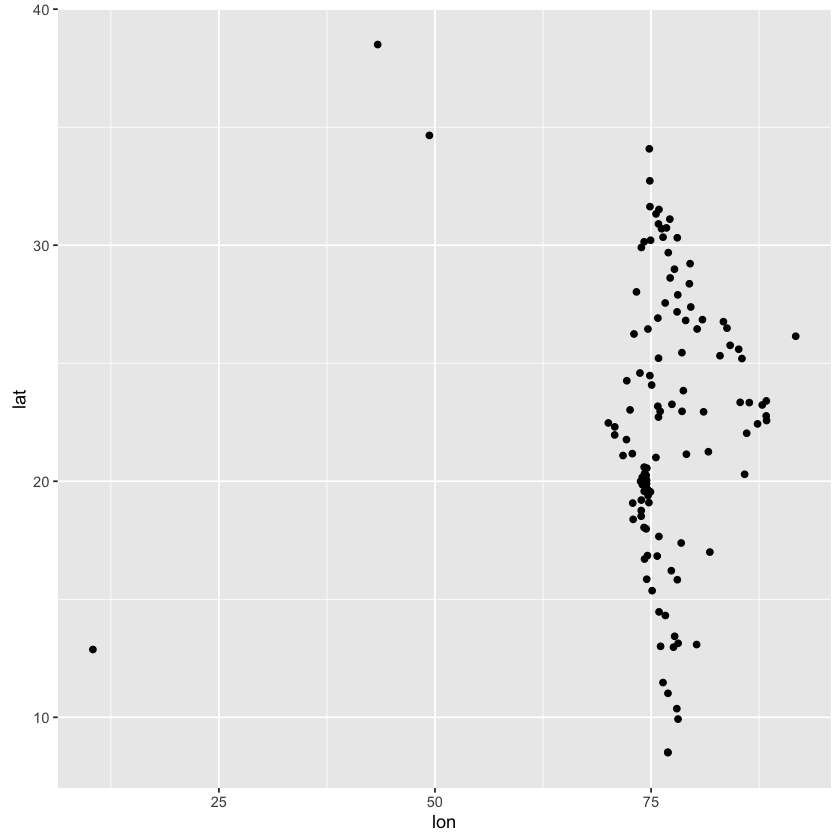

In [94]:
# Check for consitency
ggplot(dfGeo) + aes(lon, lat) + geom_point()

In [95]:
# Check for consistency
dfGeo %>% filter(lon <65) 

,city,state,city_state,lon,lat
1,BOMBORI,MS,"BOMBORI, MS",10.42254,12.87311
2,KALVAN,MS,"KALVAN, MS",49.35262,34.65133
3,VANI,MS,"VANI, MS",43.37298,38.50121


In [101]:
# Imputing the values of 
newGeo <- geocode(c("Bombay, Maharashtra", "Kalyan", "Vani,Maharashtra"))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bombay,%20Maharashtra&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kalyan&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vani,Maharashtra&sensor=false


In [102]:
newGeo

,lon,lat
1,72.87766,19.07598
2,73.13054,19.24033
3,73.89189,20.33749


In [110]:
dfGeo$lat[dfGeo$city == "BOMBORI"] <- newGeo$lat[1]
dfGeo$lon[dfGeo$city == "BOMBORI"] <- newGeo$lon[1]

In [113]:
dfGeo$lat[dfGeo$city == "KALVAN"] <- newGeo$lat[2]
dfGeo$lon[dfGeo$city == "KALVAN"] <- newGeo$lon[2]

In [114]:
dfGeo$lat[dfGeo$city == "VANI"] <- newGeo$lat[3]
dfGeo$lon[dfGeo$city == "VANI"] <- newGeo$lon[3]

In [115]:
# Check for consistency
dfGeo %>% filter(lon <65)

,city,state,city_state,lon,lat


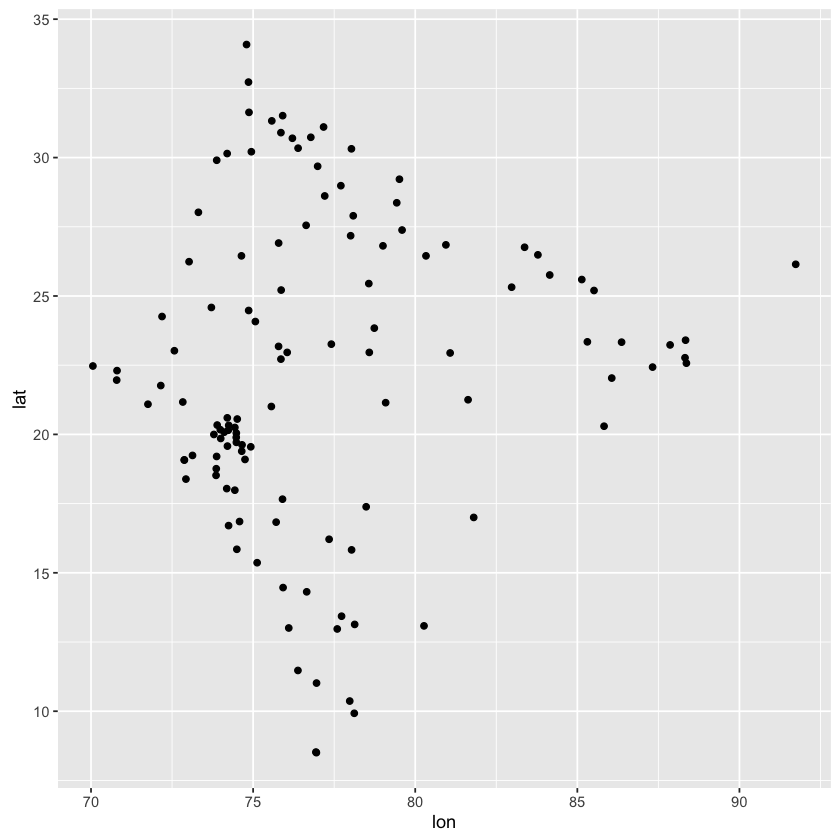

In [160]:
# Check for consitency
ggplot(dfGeo) + aes(lon, lat) + geom_point()

## PRINCIPLE: Joining two data frames

There will be many cases in which your data is in two different dataframe and you would like to merge them in to one dataframe. Let us look at one example of this - which is called left join

![](img/left_merge.png)

In [121]:
df2015CityGeo = left_join(df2015City, dfGeo, by='city')

In [122]:
head(df2015CityGeo)

,city,quantity_year,state,city_state,lon,lat
1,BANGALORE,8267060,KNT,"BANGALORE, KNT",77.59456,12.9716
2,MAHUVA,5113510,GUJ,"MAHUVA, GUJ",71.75632,21.09022
3,SOLAPUR,4162041,MS,"SOLAPUR, MS",75.90639,17.65992
4,PUNE,3591209,MS,"PUNE, MS",73.85674,18.52043
5,LASALGAON,3581359,MS,"LASALGAON, MS",74.23261,20.14914
6,PIMPALGAON,3455265,MS,"PIMPALGAON, MS",73.98738,20.16997


In [123]:
str(df2015CityGeo)

Classes 'tbl_df', 'tbl' and 'data.frame':	111 obs. of  6 variables:
 $ city         : chr  "BANGALORE" "MAHUVA" "SOLAPUR" "PUNE" ...
 $ quantity_year: int  8267060 5113510 4162041 3591209 3581359 3455265 3272139 2971205 2444020 1882161 ...
 $ state        : Factor w/ 22 levels "AP","ASM","BHR",..: 12 5 15 15 15 15 4 13 15 14 ...
 $ city_state   : chr  "BANGALORE, KNT" "MAHUVA, GUJ" "SOLAPUR, MS" "PUNE, MS" ...
 $ lon          : num  77.6 71.8 75.9 73.9 74.2 ...
 $ lat          : num  13 21.1 17.7 18.5 20.1 ...


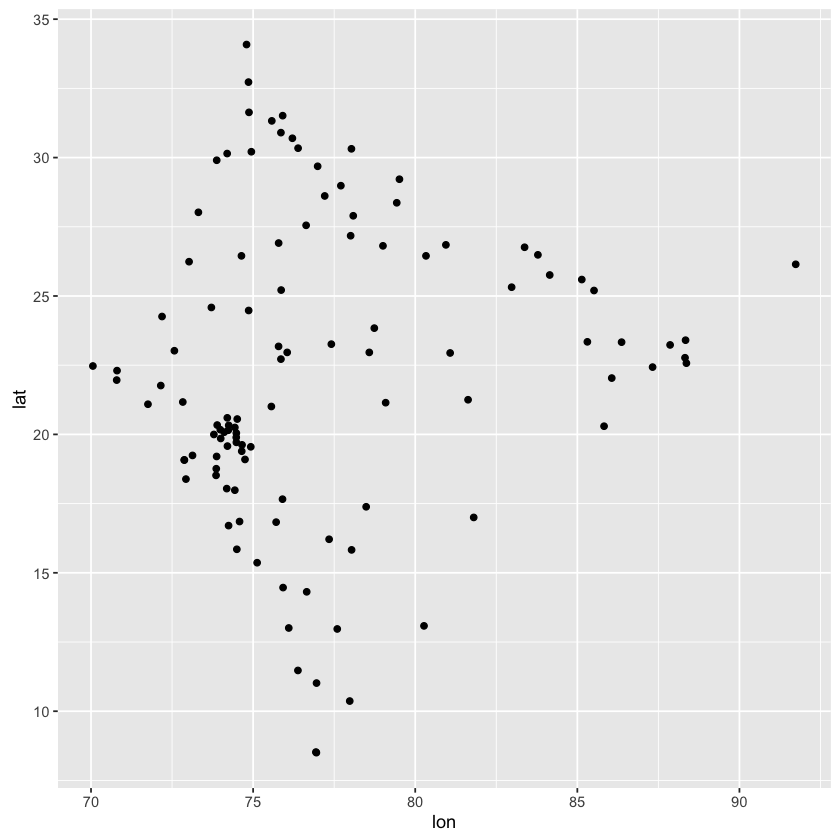

In [159]:
ggplot(df2015CityGeo) + aes(lon, lat) + geom_point()

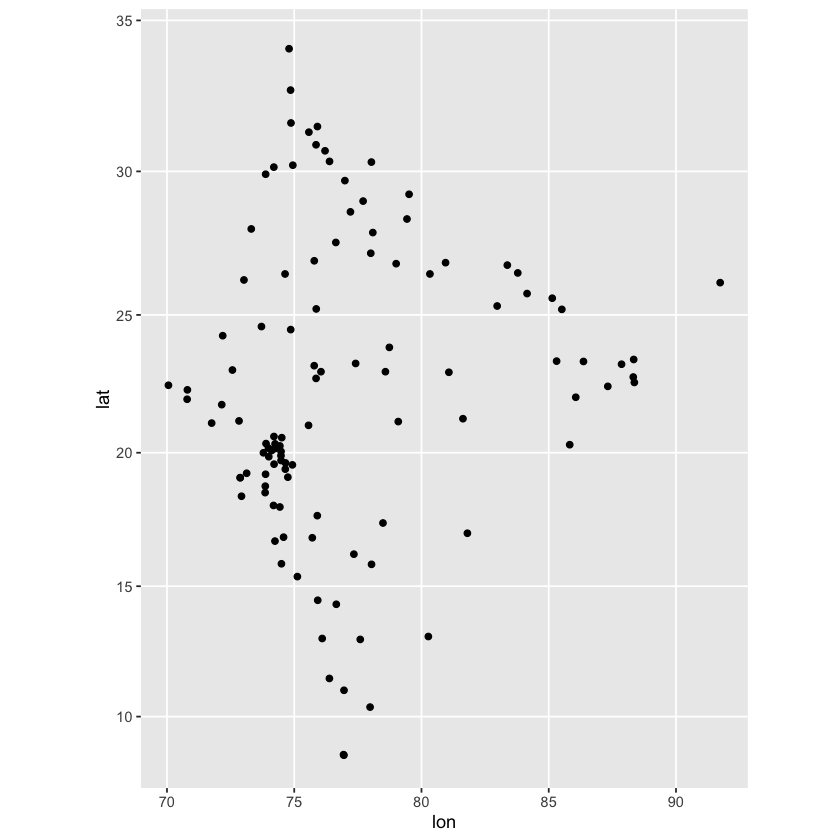

In [125]:
ggplot(df2015CityGeo) + aes(lon, lat) + geom_point() + coord_map()

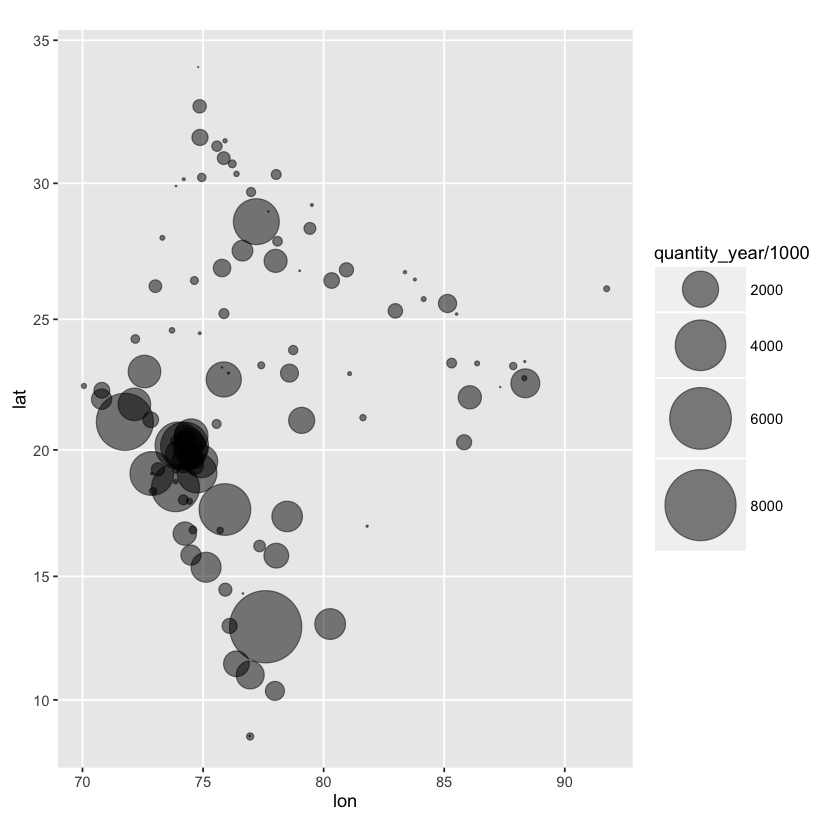

In [157]:
ggplot(df2015CityGeo) + aes(lon, lat, size = quantity_year/1000) + geom_point(alpha = 0.5) + coord_map() + 
  scale_size_continuous(range=c(0,20))

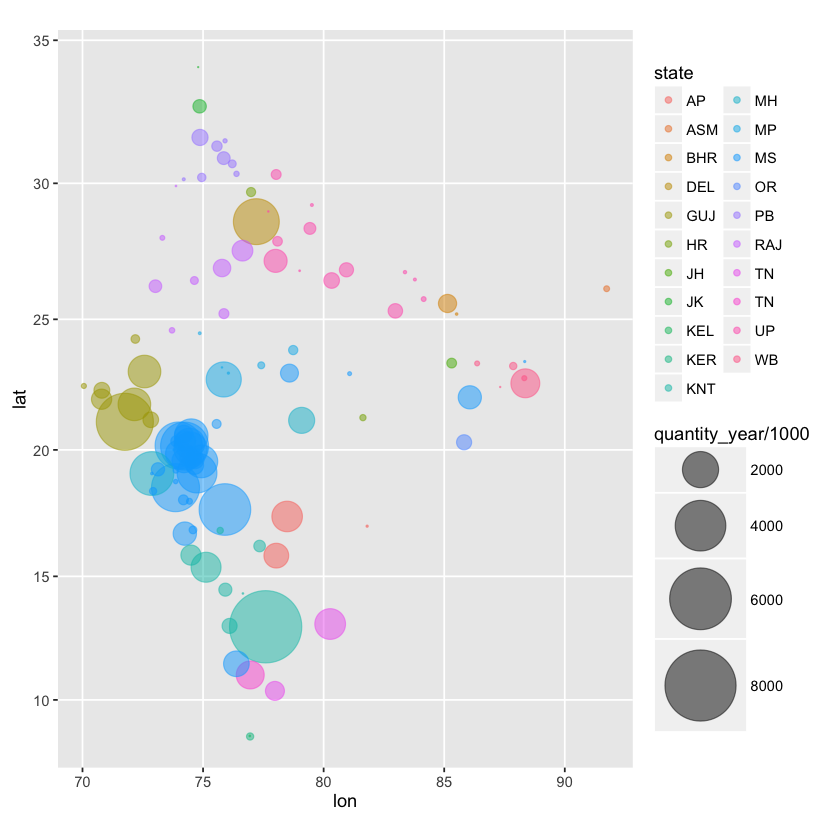

In [158]:
ggplot(df2015CityGeo) + aes(lon, lat, size = quantity_year/1000, colour = state) +
  geom_point(alpha = 0.5) + coord_map() + 
  scale_size_continuous(range=c(0,20))

### Exercise - Can you plot all the States by quantity in  geographic map